In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')


In [3]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [8]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [9]:
data = pd.merge(ratings, movies, on='movieId')
data

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [10]:
genre = set()
for i in movies['genres'].str.split('|'):
    genre.update(i)

for i in genre:
    movies[i] = movies['genres'].apply(lambda x: 1 if i in x.split('|') else 0)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

movie_matrix = data.pivot(index='userId', columns='movieId', values='rating').fillna(0)
movie_matrix = movie_matrix / movie_matrix.max().max()

train_data, test_data = train_test_split(movie_matrix, test_size=0.2, random_state=42)


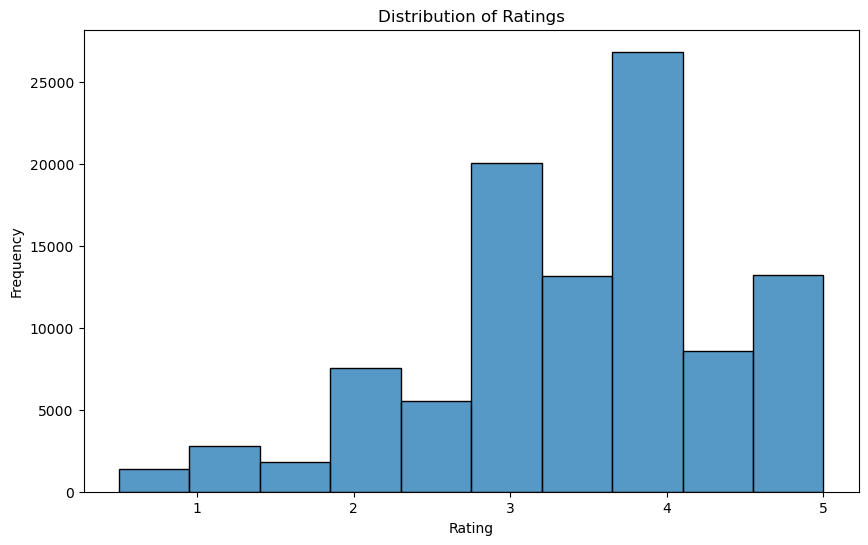

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, )
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [13]:
class RBM:
    def __init__(self, num_visible, num_hidden, learning_rate=0.01, epochs=50, batch_size=10):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

        self.weights = np.random.normal(loc=0.0, scale=0.01, size=(num_visible, num_hidden))
        self.visible_bias = np.zeros(num_visible)
        self.hidden_bias = np.zeros(num_hidden)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, data):
        num_examples = data.shape[0]

        for epoch in range(self.epochs):
            epoch_error = 0
            for i in range(0, num_examples, self.batch_size):
                batch = data[i:i + self.batch_size]
                pos_hidden_activations = np.dot(batch, self.weights) + self.hidden_bias
                pos_hidden_probs = self.sigmoid(pos_hidden_activations)
                pos_hidden_states = pos_hidden_probs > np.random.rand(self.batch_size, self.num_hidden)
                pos_associations = np.dot(batch.T, pos_hidden_probs)

                neg_visible_activations = np.dot(pos_hidden_states, self.weights.T) + self.visible_bias
                neg_visible_probs = self.sigmoid(neg_visible_activations)
                neg_hidden_activations = np.dot(neg_visible_probs, self.weights) + self.hidden_bias
                neg_hidden_probs = self.sigmoid(neg_hidden_activations)

                neg_associations = np.dot(neg_visible_probs.T, neg_hidden_probs)

                self.weights += self.learning_rate * (pos_associations - neg_associations) / self.batch_size
                self.visible_bias += self.learning_rate * np.mean(batch - neg_visible_probs, axis=0)
                self.hidden_bias += self.learning_rate * np.mean(pos_hidden_probs - neg_hidden_probs, axis=0)

                batch_error = np.mean((batch - neg_visible_probs) ** 2)
                epoch_error += batch_error

                epoch_error /= (num_examples // self.batch_size)
            print(f'Epoch {epoch + 1}/{self.epochs}, Error: {epoch_error}')

    def predict(self, data):
        hidden_activations = np.dot(data, self.weights) + self.hidden_bias
        hidden_probs = self.sigmoid(hidden_activations)
        visible_activations = np.dot(hidden_probs, self.weights.T) + self.visible_bias
        visible_probs = self.sigmoid(visible_activations)
        return visible_probs


Text(0, 0.5, 'Genre')

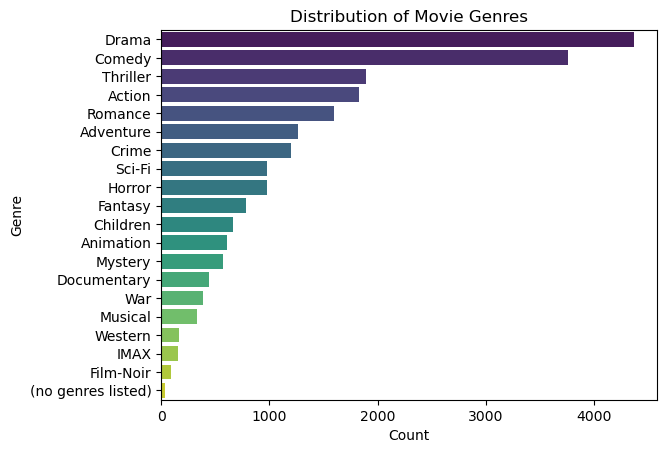

In [14]:
movies['genres'] = movies['genres'].str.split('|')
genres1 = movies.explode('genres')
genre_counts = genres1['genres'].value_counts()
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')

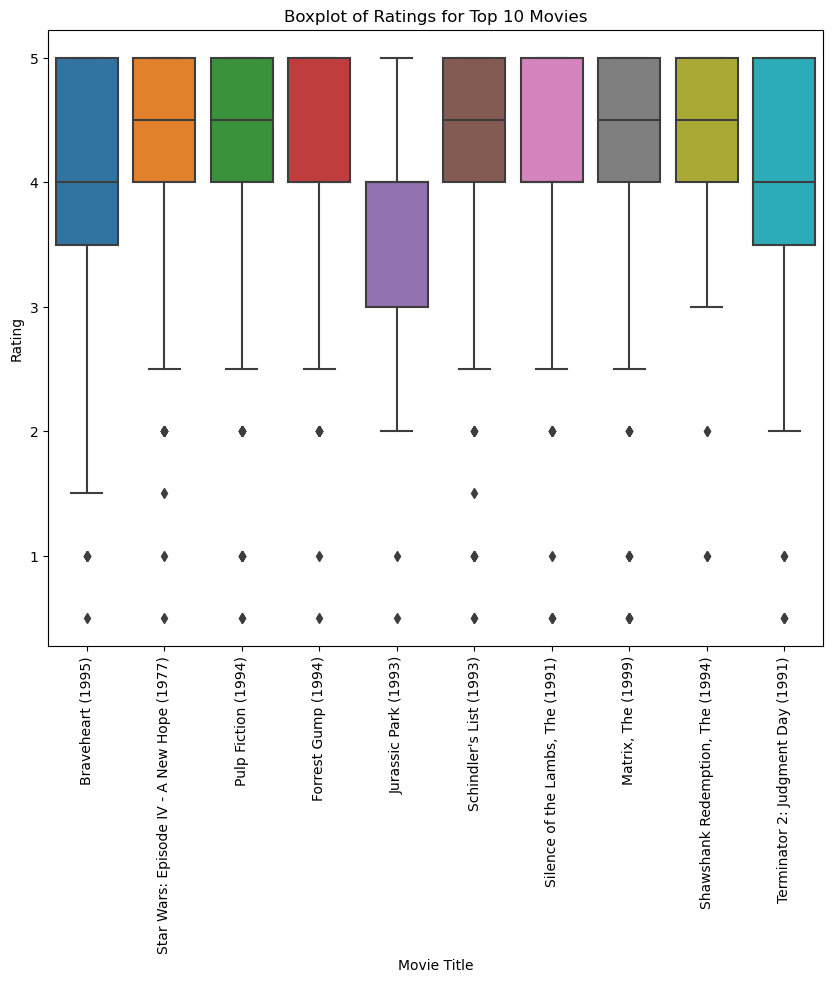

In [15]:
plt.figure(figsize=(10, 8))
top = data['title'].value_counts().index[:10]  
sns.boxplot(x='title', y='rating', data=data[data['title'].isin(top)])
plt.xticks(rotation=90)
plt.title('Boxplot of Ratings for Top 10 Movies')
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.show()

In [16]:
num_visible = movie_matrix.shape[1]
num_hidden = 128 
rbm = RBM(num_visible, num_hidden)
rbm.train(movie_matrix.values)


Epoch 1/50, Error: 0.0016093368761930114
Epoch 2/50, Error: 0.0008303124989438843
Epoch 3/50, Error: 0.0009797278661393962
Epoch 4/50, Error: 0.0009914190967685328
Epoch 5/50, Error: 0.0010608740681401793
Epoch 6/50, Error: 0.0010597851969499125
Epoch 7/50, Error: 0.0010460957935579135
Epoch 8/50, Error: 0.001025942220715336
Epoch 9/50, Error: 0.0009989257641342753
Epoch 10/50, Error: 0.0009711955114963754
Epoch 11/50, Error: 0.0009451352286832837
Epoch 12/50, Error: 0.0009212441005805739
Epoch 13/50, Error: 0.0008959396635792525
Epoch 14/50, Error: 0.00087541338521966
Epoch 15/50, Error: 0.0008473390689041141
Epoch 16/50, Error: 0.0008055559743266283
Epoch 17/50, Error: 0.0007235711043419035
Epoch 18/50, Error: 0.0006811183090765431
Epoch 19/50, Error: 0.0006595583362577234
Epoch 20/50, Error: 0.0006487621304614253
Epoch 21/50, Error: 0.0006596683697510088
Epoch 22/50, Error: 0.0006611206404254868
Epoch 23/50, Error: 0.0006523123584702922
Epoch 24/50, Error: 0.0006489543419819805
Epoc

In [17]:
def recommend_movies(rbm, user_vector, genre_movies, num_recommendations=10):
    user_vector = np.array(user_vector).reshape(1, -1)
    preds = rbm.predict(user_vector)
    top_movie_ids = preds[0].argsort()[::-1]
    recommended = genre_movies[genre_movies['movieId'].isin(top_movie_ids)]

    if len(recommended) < num_recommendations:
        additional_movies = movies[movies['movieId'].isin(top_movie_ids) & ~movies['movieId'].isin(recommended_movies['movieId'])]
        recommended = pd.concat([recommended, additional_movies]).head(num_recommendations)
    else:
        recommended = recommended.head(num_recommendations)

    return recommended['title']


In [20]:
selecte_genre = input("Enter the genre of movie you want to choose: ")
genre_movies = movies[movies[selecte_genre] == 1]

user_id = 1
user_vector = movie_matrix.loc[user_id].values
recommended_movies = recommend_movies(rbm, user_vector, genre_movies)

print("Recommended Movies:")
print(recommended_movies)

Enter the genre of movie you want to choose: Thriller
Recommended Movies:
5                                   Heat (1995)
9                              GoldenEye (1995)
19                           Money Train (1995)
20                            Get Shorty (1995)
21                               Copycat (1995)
22                             Assassins (1995)
31    Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
41                            To Die For (1995)
43                  Seven (a.k.a. Se7en) (1995)
46                   Usual Suspects, The (1995)
Name: title, dtype: object
